In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import timeit
from emcee.autocorr import *
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
nwalkers = 250
batch_size = 50
niters = 10000

In [3]:
def run(proposal, batch_size=50, niters=1000, n=5, pre=0, title=''):
    sampler = Sampler(dim=2, t_dist=Rosenbrock(), proposal=proposal, nwalkers=nwalkers)

    acc_r = 0.0
    for i in range(n):
        sampler.reset()
        p0 = np.random.randn(2*nwalkers).reshape([nwalkers, 2])
        if pre > 0:
            s = Sampler(dim=2, t_dist=Rosenbrock(), proposal=PCNWalkMove(s=None, scale=0.2), nwalkers=nwalkers)
            p0 = s.run_mcmc(pre, batch_size=batch_size, p0=p0).curr_pos
        start = timeit.default_timer()
        hist = sampler.run_mcmc(niters-pre, batch_size=batch_size, p0=p0)
        print 'finishes loop %d in %.2f seconds' % (i, float(timeit.default_timer() - start))
        acc_r += float(100*hist.acceptance_rate.mean())
        # print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
        try:
            print 'auto-correlation time: %s' % hist.auto_corr()
        except AutocorrError, err:
            pass
    hist.plot_scatter(dim=[[0, 1]])
    sns.plt.title(title)
    print 'avg_acc_r: %.2f%s' % (float(acc_r) / 5.0, '%')

##### Not using ensemble, use isotropic gaussian proposal with scale=0.2

finishes loop 0 in 5.48 seconds
finishes loop 1 in 5.19 seconds
finishes loop 2 in 5.34 seconds
finishes loop 3 in 6.44 seconds
finishes loop 4 in 6.48 seconds
avg_acc_r: 53.96%


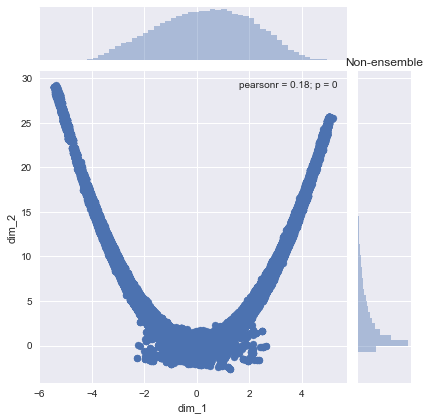

In [4]:
proposal = PCNWalkMove(s=None, scale=0.2)
run(proposal, batch_size=batch_size, niters=niters, title='Non-ensemble')

#### Use ensemble of size 3, scale=0.2.

finishes loop 0 in 9.50 seconds
finishes loop 1 in 8.86 seconds
finishes loop 2 in 8.98 seconds
finishes loop 3 in 8.72 seconds
finishes loop 4 in 8.27 seconds
avg_acc_r: 26.19%


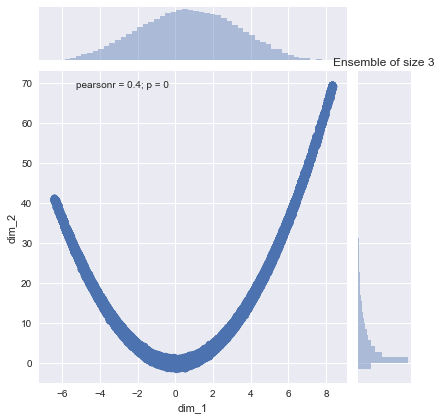

In [5]:
proposal = PCNWalkMove(s=3, scale=0.2)
run(proposal, batch_size=batch_size, niters=niters, title='Ensemble of size 3', pre=1000)

#### Ensemble with pCN, beta=0.4   
This could come from the theory behind pCN sampling, i.e. it preserves the underlying Gaussian measure.

finishes loop 0 in 10.09 seconds
auto-correlation time: [ 85.26351089  34.48666313]
finishes loop 1 in 9.92 seconds
auto-correlation time: [ 43.56346449  32.01213692]
finishes loop 2 in 9.70 seconds
auto-correlation time: [ 48.18581612  35.07031441]
finishes loop 3 in 9.53 seconds
auto-correlation time: [ 58.89672708  24.92799891]
finishes loop 4 in 9.68 seconds
auto-correlation time: [ 31.65407048  25.58908904]
avg_acc_r: 87.80%


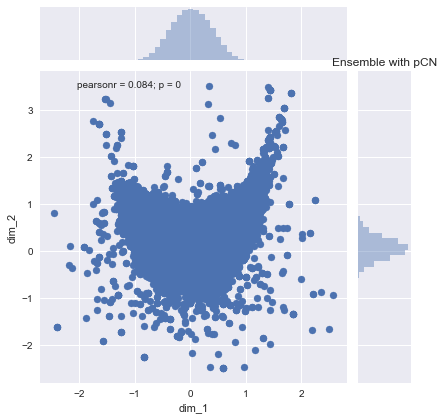

In [6]:
proposal = PCNWalkMove(s=3, beta=0.4, symmetric=True)
run(proposal, batch_size=batch_size, niters=niters, title='Ensemble with pCN')

#### Ensemble with pCN, start from the end position of isotropic gaussian proposal

finishes loop 0 in 8.76 seconds
auto-correlation time: [ 84.99291952  68.6146566 ]
finishes loop 1 in 8.65 seconds
auto-correlation time: [ 41.01770728  64.94976267]
finishes loop 2 in 8.59 seconds
auto-correlation time: [ 34.26985285  54.59622654]
finishes loop 3 in 9.01 seconds
auto-correlation time: [ 49.62167808  62.20549513]
finishes loop 4 in 8.60 seconds
auto-correlation time: [ 19.64234317  61.5516752 ]
avg_acc_r: 85.66%


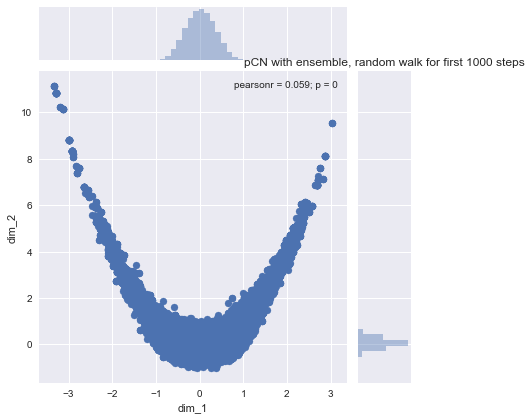

In [7]:
proposal=PCNWalkMove(s=3, beta=0.5)
run(proposal, batch_size=batch_size, niters=niters, pre=1000, title='pCN with ensemble, random walk for first 1000 steps')

#### pCN without ensemble, beta=0.4  
Check affine invariance of pCN. Notice this does not totally make sense.

finishes loop 0 in 4.94 seconds
auto-correlation time: [ 13.34685548  48.413378  ]
finishes loop 1 in 4.84 seconds
auto-correlation time: [ 20.0920568   49.13499982]
finishes loop 2 in 4.77 seconds
auto-correlation time: [ 32.59046338  38.36520135]
finishes loop 3 in 5.00 seconds
auto-correlation time: [ 38.15710486  47.51900264]
finishes loop 4 in 5.09 seconds
auto-correlation time: [ 25.08994735  37.27939865]
avg_acc_r: 53.99%


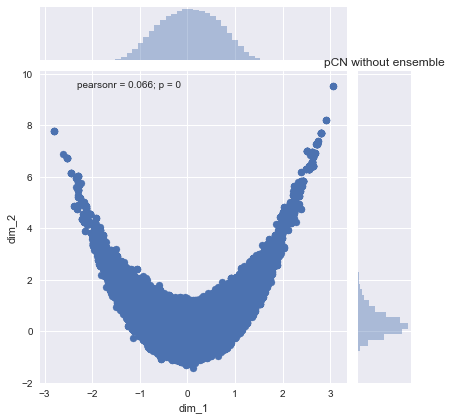

In [8]:
proposal = PCNWalkMove(s=None, beta=0.4, symmetric=True)
run(proposal, batch_size=batch_size, niters=niters, title='pCN without ensemble', pre=1000)